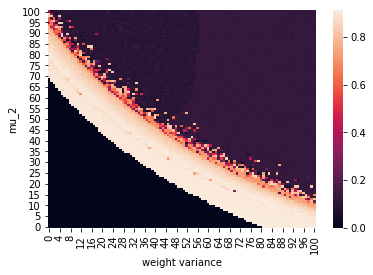

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

results = pd.read_csv("results/results.csv", header=None)
weight_var = results[2]
mu_2 = results[4]
accs = results[8]
im = np.zeros((len(np.unique(weight_var)), len(np.unique(mu_2))))
count = 0
for i in range(len(np.unique(weight_var))):
    for j in range(len(np.unique(mu_2))):
        im[i][j] = accs[count]
        count += 1

ax = sns.heatmap(im.T) #, xticklabels=np.unique(weight_var), yticklabels=np.unique(mu_2))
ax.invert_yaxis()
plt.xlabel("weight variance")
plt.ylabel("mu_2")
plt.show()